# Emerging Technologies Project
 - Usman Sattar
 - G00345816

In [47]:
# Imports
# Importing required imported, necessary for running the model.
# Helps with mathematical and scientific operation
import numpy as np
# creates a figure - like graphs, plots
import matplotlib.pyplot as plt
# Keras is a high-level neural networks API, capable of running on top of TensorFlow
import keras as kr
import tensorflow as tf

In [48]:
# Loading the files and return both training and testing sets
(x_train, y_train), (x_test, y_test) = kr.datasets.mnist.load_data()

# Scaling
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Dividing the img by 255 for scaling purposes
x_train = x_train/255
x_test = x_test/255 

y_train = kr.utils.np_utils.to_categorical(y_train, digits)
y_test = kr.utils.np_utils.to_categorical(y_test, digits)

In [49]:
plt.figure(1, figsize=(30,20))
# Loop for images
for i in range(100):
    plt.subplot(1,100,i+1)
    
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    plt.xticks([])
    plt.yticks([])

In [50]:
# Creating the model
model = kr.models.Sequential()

print("Model Created")

# Adding layers to the model

model.add(kr.layers.Dense(392, activation='relu', input_shape=(784,)))
model.add(kr.layers.Dense(392, activation='relu'))

model.add(kr.layers.Dropout(0.2))

model.add(kr.layers.Dense(10, activation='softmax'))

print("Layers Added To The Model")

Model Created
Layers Added To The Model


In [51]:
# Summerizing Model
print("Model Summary")
model.summary()

Model Summary
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_14 (Dense)             (None, 392)               154056    
_________________________________________________________________
dropout_5 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compiling Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model Compiled")

Model Compiled


In [53]:
history = model.fit(x_train, y_train, batch_size=50, epochs=5, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 300us/step - loss: 0.2049 - accuracy: 0.9381 - val_loss: 0.1060 - val_accuracy: 0.9656
Epoch 2/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.0844 - accuracy: 0.9735 - val_loss: 0.0792 - val_accuracy: 0.9735
Epoch 3/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0793 - val_accuracy: 0.9746
Epoch 4/5
60000/60000 [==============================] - 17s 285us/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0835 - val_accuracy: 0.9766
Epoch 5/5
60000/60000 [==============================] - 18s 302us/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0902 - val_accuracy: 0.9756


In [54]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.024213245
Test accuracy: 0.991999984


In [55]:
print("Saving Model")
model.save('model.h5')

Saving Model


In [56]:
print("Loading Model")
loadedModel = kr.models.load_model('model.h5')

Loading Model


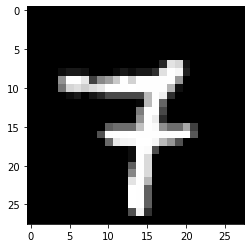

('Predicted Number: ', 7)

In [57]:
plt.imshow(x_test[75].reshape(28, 28), cmap="gray")
plt.show()

"Predicted Number: ", np.argmax(loadedModel.predict(x_test[75:76]))